In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def read_img(path, grayscale=True):
  img = cv2.imread(path)
  if grayscale:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img, cmap="gray")
    return img
  try:
    cv2.imshow("display", img) # This works on your local PC
    return img
  except Exception as e:
    print(e)
    from google.colab.patches import cv2_imshow # This is on your colab
    cv2_imshow(img)
    return img


In [3]:
img_path = '/content/drive/MyDrive/ColabNotebooks/car1.jpeg'

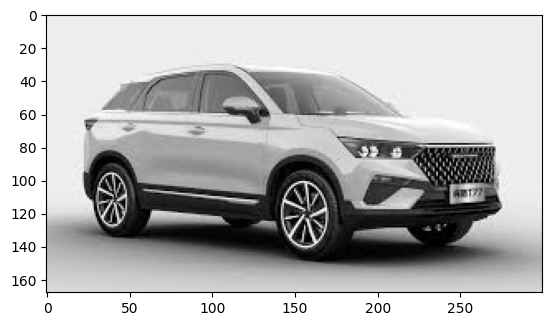

In [4]:
car = read_img(path= img_path, grayscale=True)

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



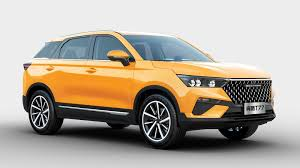

In [5]:
color_car = read_img(path= img_path, grayscale=False)

In [6]:
car.shape

(168, 300)

In [7]:
color_car.shape

(168, 300, 3)

##### Applying a single convolutional layer

In [8]:
row, col = car.shape
batch = 1 # single image is present
ch = 1 #grayscale
reshaped_car_img = car.reshape(batch, row, col, ch)

In [9]:
reshaped_car_img.shape

(1, 168, 300, 1)

In [10]:
input_shape = reshaped_car_img.shape[1:]

# defining a convolutional layer
CONV_LAYERS = [
    tf.keras.layers.Conv2D(filters = 1, kernel_size = (3,3), strides = (1,1), input_shape = input_shape)
]

conv_model = tf.keras.Sequential(CONV_LAYERS)
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 166, 298, 1)       10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# checking the trainable params
3 * 3 + 1

10

In [12]:
output = conv_model.predict(reshaped_car_img)

1/1 [==============================] - 1s 543ms/step


In [13]:
output

array([[[[-100.56581],
         [-100.56581],
         [-100.56581],
         ...,
         [-100.56581],
         [-100.56581],
         [-100.56581]],

        [[-100.56581],
         [-100.56581],
         [-100.56581],
         ...,
         [-100.56581],
         [-100.56581],
         [-100.56581]],

        [[-100.56581],
         [-100.56581],
         [-100.56581],
         ...,
         [-100.56581],
         [-100.56581],
         [-100.56581]],

        ...,

        [[ -88.8505 ],
         [ -88.8505 ],
         [ -88.8505 ],
         ...,
         [ -86.63548],
         [ -86.63548],
         [ -86.63548]],

        [[ -90.53695],
         [ -90.53695],
         [ -90.53695],
         ...,
         [ -87.48413],
         [ -87.48413],
         [ -87.48413]],

        [[ -91.98585],
         [ -91.98585],
         [ -91.98585],
         ...,
         [ -89.26397],
         [ -89.26397],
         [ -89.26397]]]], dtype=float32)

In [14]:
output.shape

(1, 166, 298, 1)

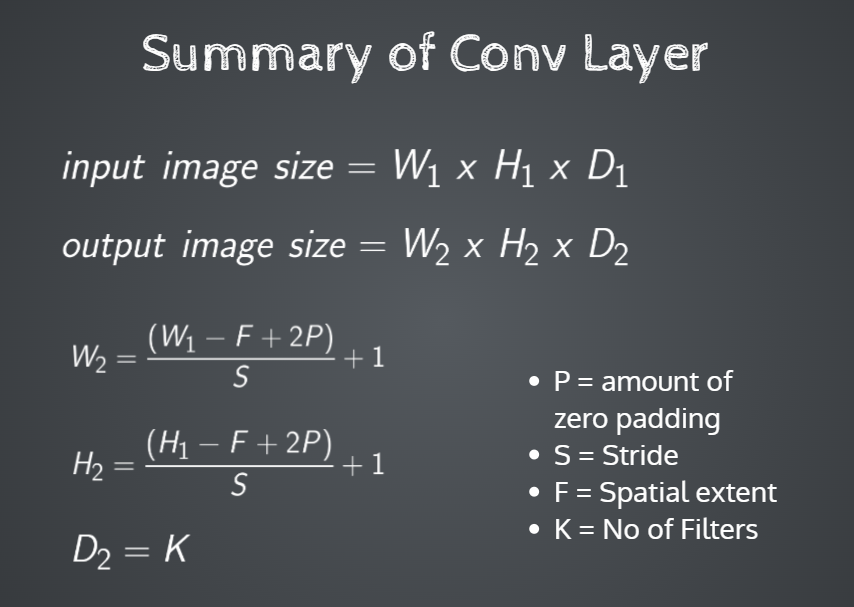

In [15]:
# no padding but 1 strike
(168 - 3 + 2*(0))//1+1

166

In [16]:
(300 - 3 + 2*(0))//1+1

298

In [18]:
row, col = output.shape[1:-1]

In [19]:
reshape_out = output.reshape(row, col)
reshape_out

array([[-100.56581, -100.56581, -100.56581, ..., -100.56581, -100.56581,
        -100.56581],
       [-100.56581, -100.56581, -100.56581, ..., -100.56581, -100.56581,
        -100.56581],
       [-100.56581, -100.56581, -100.56581, ..., -100.56581, -100.56581,
        -100.56581],
       ...,
       [ -88.8505 ,  -88.8505 ,  -88.8505 , ...,  -86.63548,  -86.63548,
         -86.63548],
       [ -90.53695,  -90.53695,  -90.53695, ...,  -87.48413,  -87.48413,
         -87.48413],
       [ -91.98585,  -91.98585,  -91.98585, ...,  -89.26397,  -89.26397,
         -89.26397]], dtype=float32)

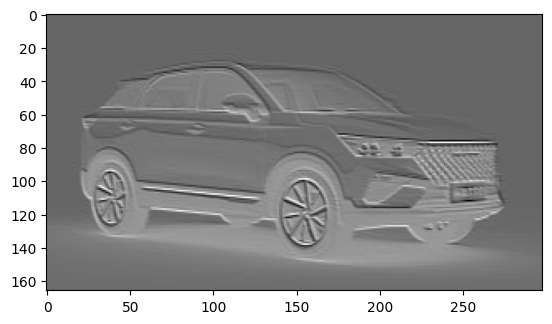

In [20]:
plt.imshow(reshape_out, cmap= 'gray')

#### For color images

In [21]:
# (1, r, c, ch)

row, col, ch = color_car.shape
color_car_reshaped = color_car.reshape(1, row, col, ch)
color_car_reshaped.shape

(1, 168, 300, 3)

In [23]:
input_shape = color_car_reshaped.shape[1:]

# defining a convolutional layer
CONV_LAYERS = [
    tf.keras.layers.Conv2D(filters = 1, kernel_size = (3,3), strides = (1,1), input_shape = input_shape)
]

conv_model = tf.keras.Sequential(CONV_LAYERS)
conv_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
3*3*3 + 1

28

In [25]:
out = conv_model.predict(color_car_reshaped)

1/1 [==============================] - 0s 219ms/step


In [26]:
out.shape

(1, 166, 298, 1)

In [29]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row, col = img.shape
    img = img.reshape(1, row, col, 1) # grayscale
    return img
  # else:
  row, col, ch = img.shape
  color_img = img.reshape(1, row, col, ch)
  return color_img

In [30]:
def get_conv_model(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=None, padding="valid"):

  CONV_LAYER = [

      tf.keras.layers.Conv2D(
          filters=filters,
          kernel_size=kernel_size,
          strides=strides,
          input_shape=input_shape)
  ]

  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model

In [31]:
def apply_conv_model_and_visualize(img, conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    _, row, col, channels = out.shape
    reshape_out = out.reshape(row, col, channels)
    for channel in range(channels):
      plt.imshow(reshape_out[:,:,channel], cmap="gray")
      plt.show()
  except Exception as e:
    raise e

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



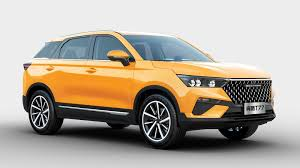

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 76ms/step
(1, 166, 298, 1)


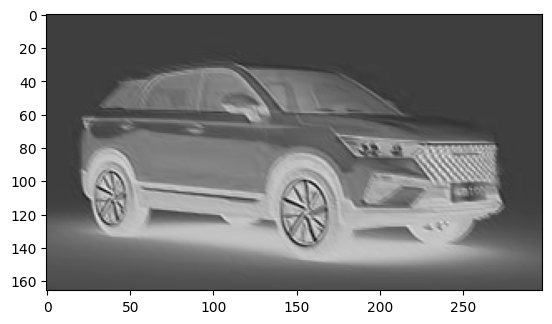

In [32]:
img = read_img(img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=1,
                       kernel_size=(3,3),
                       strides=(1,1),
                       input_shape=input_img.shape[1:],
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



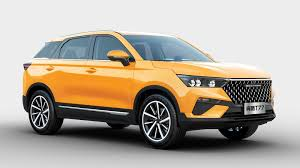

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 166, 298, 5)       140       
                                                                 
Total params: 140 (560.00 Byte)
Trainable params: 140 (560.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 124ms/step
(1, 166, 298, 5)


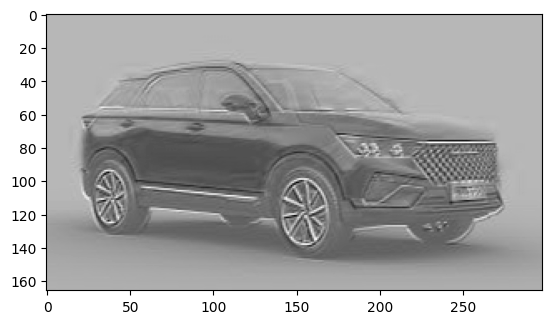

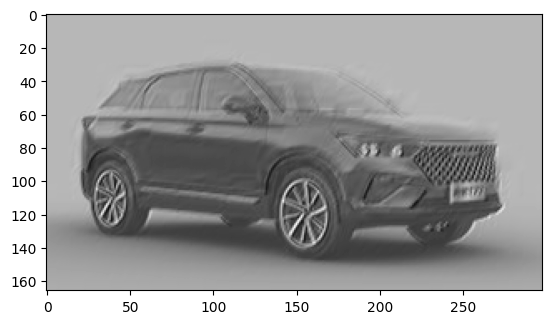

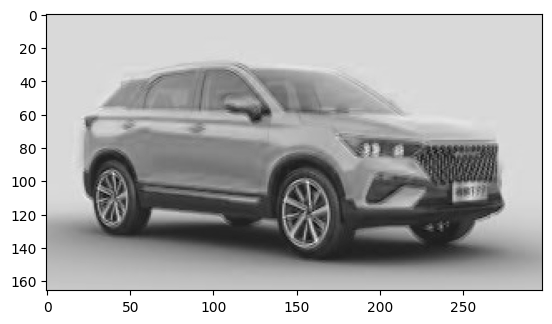

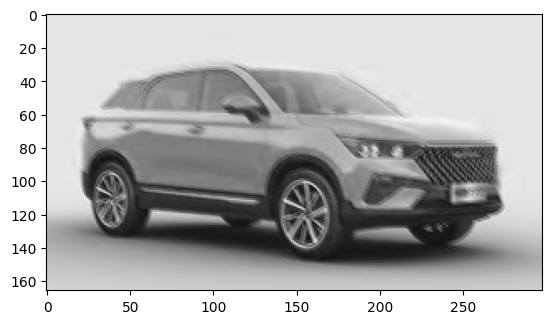

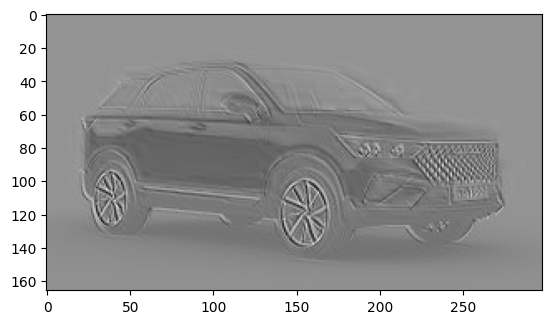

In [33]:
img = read_img(img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=5,
                       kernel_size=(3,3),
                       strides=(1,1),
                       input_shape=input_img.shape[1:],
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

In [34]:
def max_pooling(img, pool_size=(2,2), strides=(2,2)):
  reshaped_img = reshaping_in(img)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size,
                                            strides=strides)

  result = pooling_layer(reshaped_img)
  return result

(168, 300)


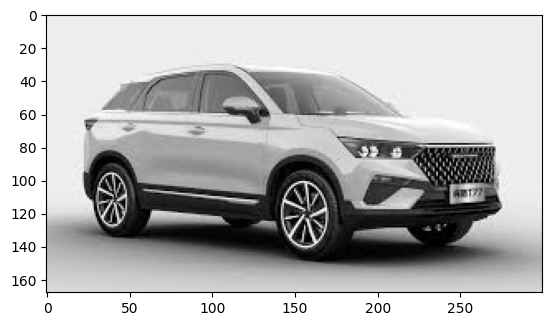

In [36]:
img = read_img(img_path)
print(img.shape)

In [37]:
result = max_pooling(img)
print(result.shape)

(1, 84, 150, 1)


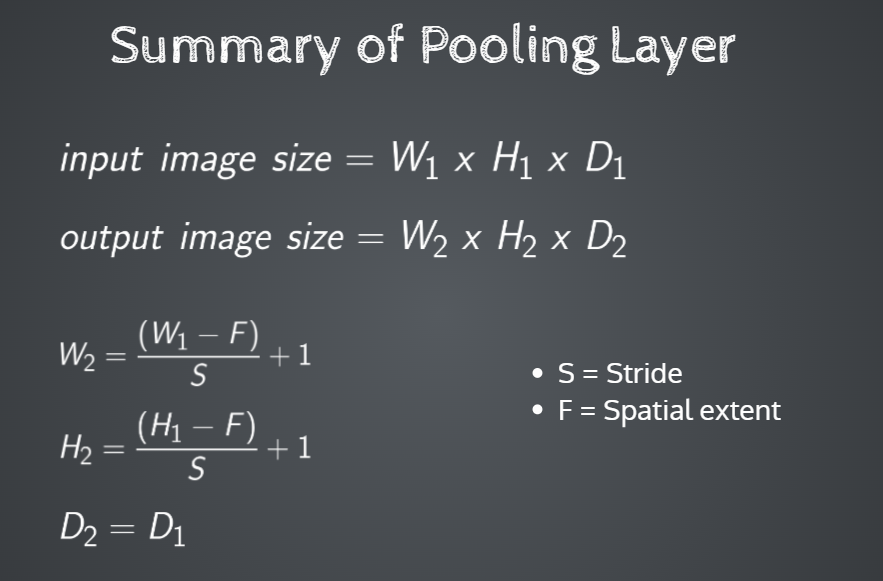

In [39]:
def plot_pooling(result):
  _, row, col, _ = result.shape
  reshape_img = tf.reshape(result, (row, col))
  plt.imshow(reshape_img, cmap="gray")

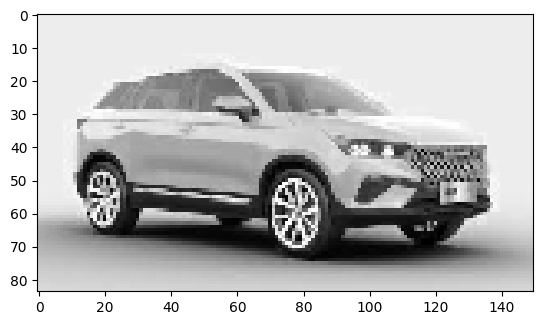

In [40]:
plot_pooling(result)